In [1]:
# 1. Pandas
import pandas as pd
#1. Read the CSV file ‘data.csv’.
df = pd.read_csv("data.csv")
#2. Show the basic statistical description about the data.
print(df.describe())
print(df.info())


         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB
None


In [22]:
#3. Check if the data has null values.
print(df.isnull().values.any())
print(df.isnull().sum())

True
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [23]:
# 3a. Replace the null values with the mean
df['Calories'].fillna(value=df['Calories'].mean(), inplace=True)
print(df)
print(df.isnull().values.any())

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]
False


In [ ]:
#4. Select at least two columns and aggregate the data using: min, max, count, mean.
dff = df[["Pulse","Calories"]].min()
df.groupby(["Duration","Pulse"]).agg(['min', 'max', 'count', 'mean'])

Maxpulse                   Calories                      
                    min  max count   mean      min     max count    mean
Duration Pulse                                                          
15       80         100  100     1  100.0     50.5    50.5     1    50.5
         124        139  139     1  139.0    124.2   124.2     1   124.2
20       83         107  107     1  107.0     50.3    50.3     1    50.3
         95         112  112     1  112.0     77.7    77.7     1    77.7
         106        136  136     1  136.0    110.4   110.4     1   110.4
...                 ...  ...   ...    ...      ...     ...   ...     ...
180      101        127  127     1  127.0    600.1   600.1     1   600.1
210      108        160  160     1  160.0   1376.0  1376.0     1  1376.0
         137        184  184     1  184.0   1860.4  1860.4     1  1860.4
270      100        131  131     1  131.0   1729.0  1729.0     1  1729.0
300      108        143  143     1  143.0   1500.2  1500.2     1  1500.2

[94 rows x 8 columns]

In [26]:
#5. Filter the dataframe to select the rows with calories values between 500 and 1000.
df[((df["Calories"]>500) & (df["Calories"]<1000))]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [27]:
#6. Filter the dataframe to select the rows with calories values > 500 and pulse <100.
df[((df["Calories"]>500) | (df["Calories"]<100))]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
60,210,108,160,1376.0
61,160,110,137,1034.4
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
69,300,108,143,1500.2
70,150,97,129,1115.0
72,90,100,127,700.0


In [28]:
#7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.
df_modified = df.loc[:, df.columns != 'Maxpulse']
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [29]:
#8. Delete the “Maxpulse” column from the main df dataframe
df.drop(["Maxpulse"],axis=1,inplace=True)
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [30]:
#9. Convert the datatype of Calories column to int datatype.
df["Calories"] = df["Calories"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Duration  169 non-null    int64
 1   Pulse     169 non-null    int64
 2   Calories  169 non-null    int64
dtypes: int64(3)
memory usage: 4.1 KB


<Axes: xlabel='Duration', ylabel='Calories'>

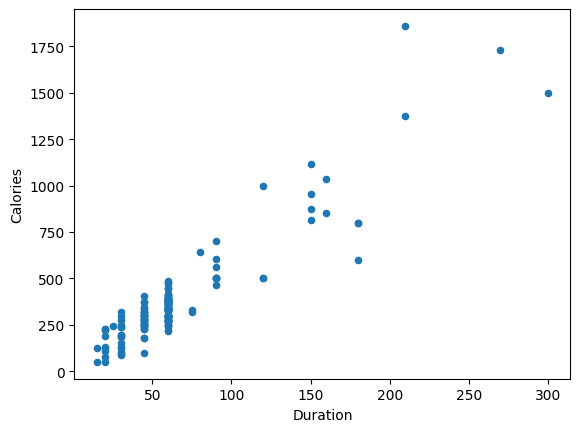

In [31]:
#10. Using pandas create a scatter plot for the two columns (Duration and Calories).
df.plot.scatter(x="Duration",y="Calories")

In [3]:
#2. Scikit-learn
!pip install datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC,SVC

In [4]:
# 1. Implement Naïve Bayes method using scikit-learn library.
# a. Use the glass dataset
glass_df = pd.read_csv("glass.csv")

In [5]:
y=glass_df["Type"]
X=glass_df.drop(["Type"],axis=1)

In [6]:
# Describes the info of glass dataset
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
# b. Use train_test_split to create training and testing part.
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.25, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [8]:
accuracy_score(y_true,y_pred)

0.46296296296296297

In [9]:
#2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)
classification_report(y_true, y_pred,output_dict=True,zero_division=1)

{'1': {'precision': 0.32142857142857145,
  'recall': 0.6428571428571429,
  'f1-score': 0.4285714285714286,
  'support': 14},
 '2': {'precision': 0.45454545454545453,
  'recall': 0.20833333333333334,
  'f1-score': 0.28571428571428575,
  'support': 24},
 '3': {'precision': 0.5,
  'recall': 0.4,
  'f1-score': 0.4444444444444445,
  'support': 5},
 '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '6': {'precision': 0.6666666666666666,
  'recall': 1.0,
  'f1-score': 0.8,
  'support': 2},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 'accuracy': 0.46296296296296297,
 'macro avg': {'precision': 0.49044011544011545,
  'recall': 0.5418650793650793,
  'f1-score': 0.4931216931216931,
  'support': 54},
 'weighted avg': {'precision': 0.4859708193041526,
  'recall': 0.46296296296296297,
  'f1-score': 0.438506760728983,
  'support': 54}}

In [10]:
# 1. Implement linear SVM method using scikit library
svc = SVC(max_iter=500000)
y_pred = svc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_true,y_pred)

0.25925925925925924

In [11]:
#2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)
classification_report(y_true, y_pred,output_dict=True,zero_division=1)

{'1': {'precision': 0.25925925925925924,
  'recall': 1.0,
  'f1-score': 0.4117647058823529,
  'support': 14},
 '2': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 24},
 '3': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5},
 '5': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '6': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '7': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7},
 'accuracy': 0.25925925925925924,
 'macro avg': {'precision': 0.8765432098765432,
  'recall': 0.16666666666666666,
  'f1-score': 0.06862745098039215,
  'support': 54},
 'weighted avg': {'precision': 0.8079561042524006,
  'recall': 0.25925925925925924,
  'f1-score': 0.10675381263616558,
  'support': 54}}

In [12]:
# Implement linear SVM method using scikit library
linear_svc = LinearSVC(max_iter=500000)
y_pred = linear_svc.fit(X_train, y_train).predict(X_test)
accuracy_score(y_true,y_pred)

0.5925925925925926

In [13]:
classification_report(y_true, y_pred,output_dict=True,zero_division=1)

{'1': {'precision': 0.48,
  'recall': 0.8571428571428571,
  'f1-score': 0.6153846153846153,
  'support': 14},
 '2': {'precision': 0.631578947368421,
  'recall': 0.5,
  'f1-score': 0.5581395348837209,
  'support': 24},
 '3': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5},
 '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2},
 '6': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 2},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7},
 'accuracy': 0.5925925925925926,
 'macro avg': {'precision': 0.6019298245614034,
  'recall': 0.4761904761904762,
  'f1-score': 0.445587358378056,
  'support': 54},
 'weighted avg': {'precision': 0.6458869395711502,
  'recall': 0.5925925925925926,
  'f1-score': 0.5557543231961837,
  'support': 54}}

In [16]:
# Visualization 1 to show correlations in Glass Dataset
glass_df.corr().style.background_gradient(cmap="Blues")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: ylabel='Count'>

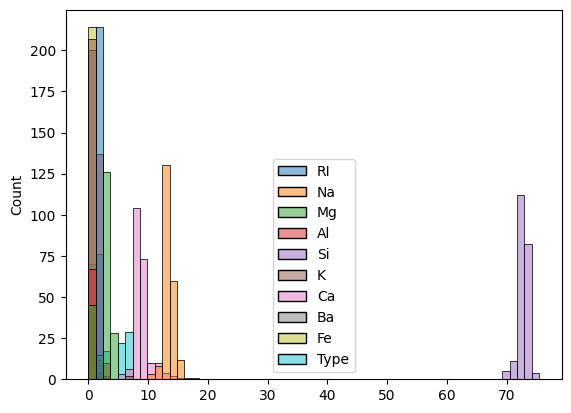

In [17]:
# Visualization 2 to show correlations in Glass Dataset
sns.histplot(glass_df)

In [ ]:
On Glass Dataset:

Linear SVM has the better accuracy than SVM and Naïve Bayes method

SVMs are different from other Naive Bayes algorithm because of the way they choose the decision boundary that maximizes the distance 
from the nearest data points of all the classes. The maximum margin classifier or maximum margin hyper plane is the name of the decision 
boundary generated by SVMs.